In [1]:
%pylab inline
import pandas as pd
import numpy as np
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
def make_lognorm(mean,std):
    # Creates lognormal distribution with specific mean and standard deviation
    shape = np.sqrt(np.log((std**2 + mean**2)/mean**2))
    scale = (mean**3 * np.sqrt((std**2 + mean**2)/mean**2))/(std**2 + mean**2)
    return stats.lognorm(shape,scale=scale)


In [3]:

def est_poission_rate_ci(n_events, 
                         source_duration, 
                         target_duration=1.0, 
                         ci=0.98,
                         expected_avg_n_events_per_unit_duration=200):
    """
    Estimate poission rate parameter confidence interval

    Parameters
    ----------
    n_events : int
        number of observed events
    source_duration : float
        duration for which n_events were observed
    target_duration : float
        duration for which to return expected rate
    ci : float
        size of confidence interval

    Returns
    -------
    (float,float)
        Confidence interval left, right bounds
    """
    
    def calc_posterior(prior_shape, prior_scale, n_events, duration):
        posterior_shape = prior_shape + n_events
        posterior_scale = prior_scale/(prior_scale*duration+1)

        return posterior_shape, posterior_scale

    rate_prior_average = expected_avg_n_events_per_unit_duration
    rate_prior_shape = 1
    rate_prior_scale = rate_prior_average/rate_prior_shape
    rate_prior = stats.gamma(rate_prior_shape,scale=rate_prior_scale)
    
    posterior_shape, posterior_scale = calc_posterior(rate_prior_shape, 
                                                      rate_prior_scale, 
                                                      n_events, 
                                                      source_duration/target_duration)
    posterior = stats.gamma(posterior_shape,scale=posterior_scale)
    return posterior
    

In [4]:
# Find lower bound for specific confidence interval
def find_lower_ci(obs,risk_premium):
    exp_rate = np.array(desp(obs))
    #exp_rate = exp_rate.reshape((len(exp_rate), 1))        
    lower_ci = np.array(([(rate - risk_premium) for rate in exp_rate]))
    df['lower_ci'] = lower_ci


def is_outlier(lower_ci, obs):
    # lower_ci - Any rate below lower_ci is an outlier
    # Observed rate estimated from observations
    obs_rate = est_poission_rate_ci(obs,1)
    return obs_rate.cdf(lower_ci) > 0.99

In [5]:
def desp(pax):

    """
    Estimate expected rate parameter 

    Parameters
    ----------
    pax : DataFrame
        Pax to forecast 

    Returns
    -------
    (array,array)
        pax prediction, pax groundtruth
    """

    alphas = [0.496] #496
    t = 1
    sqt_prev = 0
    sqt2_prev = 0
    for alpha in alphas: 
        exp_rate = []
        for p in pax:
            f = alpha * t / (1 - alpha)
            sqt_x = (alpha * p) + ((1 - alpha) * sqt_prev)
            sqt2_x = (alpha * sqt_x) + ((1 - alpha) * sqt2_prev)
            pred_x = (2 + f) * sqt_x - (1 + f) * sqt2_x
            if pred_x < 0:
                result = 0 
            else:
                result = np.array(pred_x)
            sqt_prev = np.array(sqt_x)
            sqt2_prev = np.array(sqt2_x)
            exp_rate.append(result)  

    exp_rate = np.array(exp_rate)
    
    return exp_rate

In [6]:
obs = 170
lower_ci = 154.901755
is_outlier(lower_ci, obs)

False

In [69]:
obs = 7
lower_ci = obs*2.3
print(lower_ci)
is_outlier(lower_ci, obs)

16.099999999999998


True

In [10]:
def calc_detection_rate(exp_rate_mean,anomaly_mult):
    expected_rate = make_lognorm(exp_rate_mean,exp_rate_mean/1000)
    exp_rate_lower_ci = find_lower_ci(exp_ra )
    
    detections = list()
    for obs in stats.poisson(expected_rate.rvs(100)*anomaly_mult).rvs():
        detections.append(is_outlier(exp_rate_lower_ci, obs) )
    return np.array(detections).mean()

In [18]:
mult = np.linspace(0,1.1)
dr = list()
for i, m in enumerate(mult):
    print(f'\r{i}',end='   ',flush=True)
    dr.append( calc_detection_rate(200,m))

0   

TypeError: find_lower_ci() missing 2 required positional arguments: 'df' and 'risk_premium'

Text(0.5, 0, 'Anomaly coef')

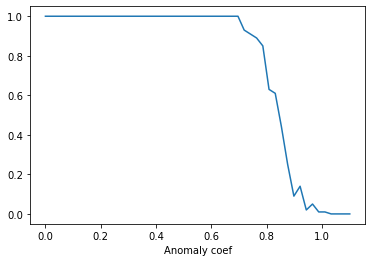

In [75]:
plot(mult,dr)
xlabel("Anomaly coef")

In [19]:
calc_detection_rate(5)

TypeError: calc_detection_rate() missing 1 required positional argument: 'anomaly_mult'

In [213]:
detections = list()
for _ in range(2000):
    obs = stats.poisson(expected_rate.rvs(1) * 0.5 ).rvs()
    detections.append(is_outlier(exp_rate_lower_ci, obs) )
detection_rate = np.array(detections).mean()

In [214]:
detection_rate

0.0895

In [215]:
obs = stats.poisson(expected_rate.rvs(1)).rvs()
obs_rate = est_poission_rate_ci(obs,1)

In [216]:
def is_outlier(lower_ci, obs):
    obs_rate = est_poission_rate_ci(obs,1)
    return obs_rate.cdf(exp_rate_lower_ci) > 0.95

In [217]:
obs_rate.cdf(exp_rate_lower_ci) > 0.95

False

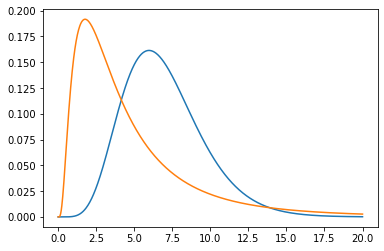

In [220]:
support = np.linspace(0,20,1000)
plot(support, obs_rate.pdf(support))
plot(support, expected_rate.pdf(support))

In [63]:
expected_rate.cdf(0.1)

2.6474316024486853e-86